## IMPORTING LIBRARIES

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df = pd.read_csv("https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv")

In [3]:
df[['bore','stroke','compression-ratio','horsepower']].corr()

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055390,0.001263,0.566936
stroke,-0.055390,1.000000,0.187923,0.098462
compression-ratio,0.001263,0.187923,1.000000,-0.214514
horsepower,0.566936,0.098462,-0.214514,1.000000


## Continuous numerical variables

#### Positive linear relationship

(0, 55758.26744330561)

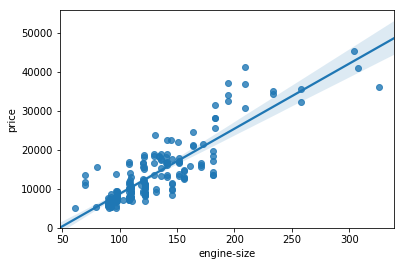

In [4]:
sns.regplot(x="engine-size",y="price",data=df)
plt.ylim(0)

In [5]:
df[["engine-size","price"]].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


#### negative linear relationship


In [6]:
df[["highway-mpg","price"]].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


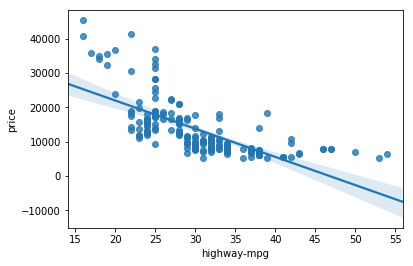

In [7]:
sns.regplot(x="highway-mpg",y="price",data=df)

#### WEAK Lineral relationship

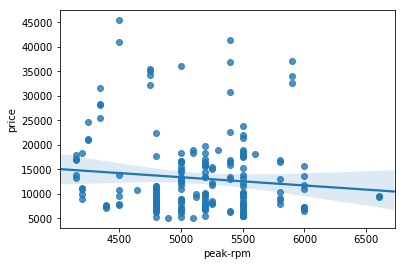

In [8]:
sns.regplot(x="peak-rpm",y="price",data=df)

In [9]:
df[["stroke","price"]].corr()

,stroke,price
stroke,1.00000,0.08231
price,0.08231,1.00000


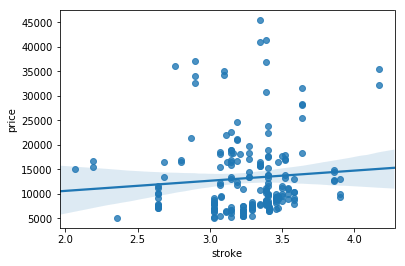

In [10]:
sns.regplot(x="stroke",y="price",data=df)

## CATEGORICAL VARIABLES

<p>These are variables that describe a 'characteristic' of a data unit, and are selected from a small group of categories. The categorical variables can have the type "object" or "int64". A good way to visualize categorical variables is by using boxplots.</p>

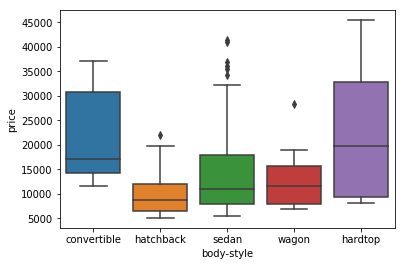

In [11]:
sns.boxplot(x="body-style",y="price",data=df)

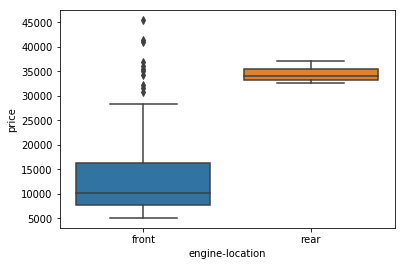

In [12]:
sns.boxplot(x="engine-location",y="price",data=df)

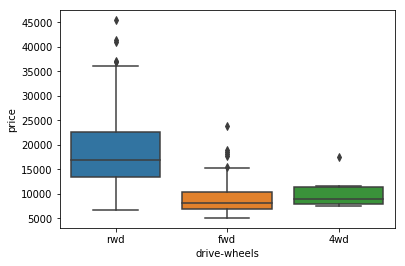

In [13]:
sns.boxplot(x="drive-wheels",y="price",data=df)

## Descriptive Statistical Analysis

p>Let's first take a look at the variables by utilizing a description method.</p>

<p>The <b>describe</b> function automatically computes basic statistics for all continuous variables. Any NaN values are automatically skipped in these statistics.</p>

This will show:
<ul>
    <li>the count of that variable</li>
    <li>the mean</li>
    <li>the standard deviation (std)</li> 
    <li>the minimum value</li>
    <li>the IQR (Interquartile Range: 25%, 50% and 75%)</li>
    <li>the maximum value</li>
<ul>


In [14]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


In [15]:
df.describe(include=['object'])

,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,201,201,201,201,201,201,201,201,201,200
unique,22,2,2,5,3,2,6,7,8,3
top,toyota,std,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,165,115,94,118,198,145,157,92,115


In [16]:
df["drive-wheels"].value_counts().to_frame()

,drive-wheels
fwd,118
rwd,75
4wd,8


In [17]:
drive_wheels_count = df['drive-wheels'].value_counts().to_frame()

In [18]:
drive_wheels_count.rename(columns={'drive-wheels': "value_counts"},inplace=True)

In [19]:
drive_wheels_count

,value_counts
fwd,118
rwd,75
4wd,8


In [20]:
drive_wheels_count.index.name = 'drive-wheels'

In [21]:
drive_wheels_count

,value_counts
drive-wheels,
fwd,118
rwd,75
4wd,8


In [22]:
engine_location_counts = df["engine-location"].value_counts().to_frame()

In [23]:
engine_location_counts

,engine-location
front,198
rear,3


In [24]:
engine_location_counts.rename(columns={"engine-location": "value_counts"}, inplace=True)

In [25]:
engine_location_counts.index.name = "engine-location"

In [26]:
engine_location_counts.head(10)

,value_counts
engine-location,
front,198
rear,3



## Basics of Grouping

<p>The "groupby" method groups data by different categories. The data is grouped based on one or several variables and analysis is performed on the individual groups.</p>

<p>For example, let's group by the variable "drive-wheels". We see that there are 3 different categories of drive wheels.</p>

In [27]:
df_group_one = df[["drive-wheels","body-style","price"]]

In [28]:
df_group_one.groupby("drive-wheels").mean()

,price
drive-wheels,
4wd,10241.000000
fwd,9244.779661
rwd,19757.613333


In [29]:
grouped_test = df_group_one.groupby(["drive-wheels","body-style"],as_index=False).mean()

In [30]:
gruped_pivot = grouped_test.pivot(index="drive-wheels",columns="body-style")

In [31]:
gruped_pivot.fillna(0,inplace=True)

In [32]:
gruped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [33]:
df[["body-style","price"]].groupby("body-style").mean()

,price
body-style,
convertible,21890.500000
hardtop,22208.500000
hatchback,9957.441176
sedan,14459.755319
wagon,12371.960000


## HEATMAP

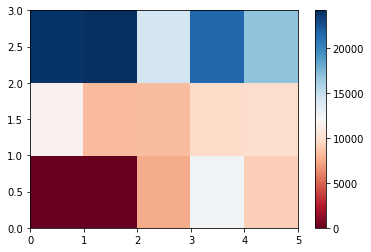

In [34]:
plt.pcolor(gruped_pivot,cmap="RdBu")
plt.colorbar()
plt.show()

In [35]:
import plotly
import plotly.plotly as py
import plotly.graph_objs as go

In [36]:
plotly.tools.set_credentials_file(username='lrrieta1526', api_key='frJ4grnGfO30kKhjMf8F')


In [37]:
0.5col_labels = gruped_pivot.index

SyntaxError: invalid syntax (<ipython-input-37-67ef907c7c77>, line 1)

In [ ]:
rows_labels = gruped_pivot.columns.levels[1]

In [ ]:
trace = go.Heatmap(z=gruped_pivot,x=rows_labels,y=col_labels)

In [ ]:
data = [trace]

In [ ]:
py.iplot(data, filename='basic-heatmap')

## Correlation and Causation

<p><b>Correlation</b>: a measure of the extent of interdependence between variables.</p>

<p><b>Causation</b>: the relationship between cause and effect between two variables.</p>

<p>It is important to know the difference between these two and that correlation does not imply causation. Determining correlation is much simpler  the determining causation as causation may require independent experimentation.</p>

<b>P-value</b>: 
<p>What is this P-value? The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.</p>

By convention, when the
<ul>
    <li>p-value is $<$ 0.001: we say there is strong evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.05: there is moderate evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.1: there is weak evidence that the correlation is significant.</li>
    <li>the p-value is $>$ 0.1: there is no evidence that the correlation is significant.</li>
</ul>


### Person correlation

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,cmap="RdYlGn")


<p>According to this heatmap the best linear relation features with price are: </p>
<ol>
    <li>Engine-size</li>
    <li>Curb-weight</li>
    <li>horsepower</li>
    <li>Width</li>
    <li>Length</li>
    <li>Wheel base</li>
    <li>Bore</li>
    <li>City MPG</li>
    <li>Highway MPG</li>
    </ol>
    
<p> Categorical Variables</p>
<ol>
    <li>Drive-wheels</li>
</ol>

## Using ExtraTreeClassifier to feature selection

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
model = ExtraTreesClassifier()

In [ ]:
features = pd.Series(model.feature_importances_,index=x.columns)

In [ ]:
features.nlargest(10).plot(kind='barh')

## ANOVA: Analysis of Variance


<p>The Analysis of Variance  (ANOVA) is a statistical method used to test whether there are significant differences between the means of two or more groups. ANOVA returns two parameters:</p>

<p><b>F-test score</b>: ANOVA assumes the means of all groups are the same, calculates how much the actual means deviate from the assumption, and reports it as the F-test score. A larger score means there is a larger difference between the means.</p>

<p><b>P-value</b>:  P-value tells how statistically significant is our calculated score value.</p>

<p>If our price variable is strongly correlated with the variable we are analyzing, expect ANOVA to return a sizeable F-test score and a small p-value.</p>

In [39]:
df_gptest = df[['drive-wheels','body-style','price']]

In [41]:
grouped_test2 = df_gptest[['drive-wheels','price']]

In [44]:
grouped_test2=df_gptest[['drive-wheels', 'price']].groupby(['drive-wheels'])


In [48]:
grouped_test2.get_group('4wd')['price']

4      17450.0
136     7603.0
140     9233.0
141    11259.0
144     8013.0
145    11694.0
150     7898.0
151     8778.0
Name: price, dtype: float64

In [54]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'], grouped_test2.get_group('4wd')['price'])  
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 67.95406500780399 , P = 3.3945443577151245e-23
